Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2017/2018  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 5: Probabilistički grafički modeli, naivni Bayes, grupiranje i vrednovanje klasifikatora

*Verzija: 1.3  
Zadnji put ažurirano: 12. siječnja 2018.*

(c) 2015-2017 Jan Šnajder, Domagoj Alagić  

Objavljeno: **30. listopada 2018.**  
Rok za predaju: **22. siječnja 2018. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od tri zadatka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import codecs
import mlutils
import matplotlib.pyplot as plt
import pgmpy as pgm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Probabilistički grafički modeli -- Bayesove mreže

Ovaj zadatak bavit će se Bayesovim mrežama, jednim od poznatijih probabilističkih grafičkih modela (*probabilistic graphical models*; PGM). Za lakše eksperimentiranje koristit ćemo programski paket [`pgmpy`](https://github.com/pgmpy/pgmpy). Molimo Vas da provjerite imate li ovaj paket te da ga instalirate ako ga nemate.

#### (a)  
Prvo ćemo pogledati udžbenički primjer s prskalicom. U ovom primjeru razmatramo Bayesovu mrežu koja modelira zavisnosti između oblačnosti (slučajna varijabla $C$), kiše ($R$), prskalice ($S$) i mokre trave ($W$). U ovom primjeru također pretpostavljamo da već imamo parametre vjerojatnosnih distribucija svih čvorova. Ova mreža prikazana je na sljedećoj slici:

![This](http://www.fer.unizg.hr/_download/repository/bayes-net-sprinkler.jpg)

Koristeći paket `pgmpy`, konstruirajte Bayesovu mrežu iz gornjeg primjera. Zatim, koristeći **egzaktno** zaključivanje, postavite sljedeće posteriorne upite: $P(w=1)$, $P(s=1|w=1)$, $P(r=1|w=1)$, $P(c=1|s=1, r=1)$ i $P(c=1)$. Provedite zaključivanje na papiru i uvjerite se da ste ispravno konstruirali mrežu. Pomoći će vam službena dokumentacija te primjeri korištenja (npr. [ovaj](https://github.com/pgmpy/pgmpy/blob/dev/examples/Monte%20Hall%20Problem.ipynb)).

In [2]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete.CPD import TabularCPD
from pgmpy.inference import VariableElimination

In [3]:
# Vaš kôd ovdje...
model = BayesianModel([('C', 'S'), ('C', 'R'), ('S', 'W'), ('R', 'W')])
cpd_c = TabularCPD('C', 2, [[0.5, 0.5]])
cpd_s = TabularCPD('S', 2, [[0.1, 0.5], [0.9, 0.5]], evidence=['C'], evidence_card=[2])
cpd_r = TabularCPD('R', 2, [[0.8, 0.2], [0.2, 0.8]], evidence=['C'], evidence_card=[2])
cpd_w = TabularCPD('W', 2, [[0.99, 0.9, 0.9, 0.0], [0.01, 0.1, 0.1, 1.0]], evidence=['S', 'R'], evidence_card=[2, 2])

model.add_cpds(cpd_c, cpd_s, cpd_r, cpd_w)
infer = VariableElimination(model)

posterior_p = infer.query(['W'])
print(posterior_p['W'])

posterior_p = infer.query(['S'], evidence={'W': 1})
print(posterior_p['S'])

posterior_p = infer.query(['R'], evidence={'W': 1})
print(posterior_p['R'])

posterior_p = infer.query(['C'], evidence={'S': 1, 'R': 1})
print(posterior_p['C'])

posterior_p = infer.query(['C'])
print(posterior_p['C'])


╒═════╤══════════╕
│ W   │   phi(W) │
╞═════╪══════════╡
│ W_0 │   0.6471 │
├─────┼──────────┤
│ W_1 │   0.3529 │
╘═════╧══════════╛
╒═════╤══════════╕
│ S   │   phi(S) │
╞═════╪══════════╡
│ S_0 │   0.0621 │
├─────┼──────────┤
│ S_1 │   0.9379 │
╘═════╧══════════╛
╒═════╤══════════╕
│ R   │   phi(R) │
╞═════╪══════════╡
│ R_0 │   0.1187 │
├─────┼──────────┤
│ R_1 │   0.8813 │
╘═════╧══════════╛
╒═════╤══════════╕
│ C   │   phi(C) │
╞═════╪══════════╡
│ C_0 │   0.3103 │
├─────┼──────────┤
│ C_1 │   0.6897 │
╘═════╧══════════╛
╒═════╤══════════╕
│ C   │   phi(C) │
╞═════╪══════════╡
│ C_0 │   0.5000 │
├─────┼──────────┤
│ C_1 │   0.5000 │
╘═════╧══════════╛


**Q:** Koju zajedničku vjerojatnosnu razdiobu ova mreža modelira? Kako tu informaciju očitati iz mreže?  
**Q:** U zadatku koristimo egzaktno zaključivanje. Kako ono radi?  
**Q:** Koja je razlika između posteriornog upita i MAP-upita?  
**Q:** Zašto je vjerojatnost $P(c=1)$ drugačija od $P(c=1|s=1,r=1)$ ako znamo da čvorovi $S$ i $R$ nisu roditelji čvora $C$?

#### (b)  
**Efekt objašnjavanja** (engl. *explaining away*) zanimljiv je fenomen u kojem se događa da se dvije varijable "natječu" za objašnjavanje treće. Ovaj fenomen može se primijetiti na gornjoj mreži. U tom se slučaju varijable prskalice ($S$) i kiše ($R$) "natječu" za objašnjavanje mokre trave ($W$). Vaš zadatak je pokazati da se fenomen zaista događa.

In [4]:
# Vaš kôd ovdje...
posterior_p = infer.query(['S'], evidence={'W':1, 'R':0})
print(posterior_p['S'])
posterior_p = infer.query(['S'], evidence={'W':1, 'R':1})
print(posterior_p['S'])

posterior_p = infer.query(['R'], evidence={'W':1, 'S':0})
print(posterior_p['R'])
posterior_p = infer.query(['R'], evidence={'W':1, 'S':1})
print(posterior_p['R'])

╒═════╤══════════╕
│ S   │   phi(S) │
╞═════╪══════════╡
│ S_0 │   0.0215 │
├─────┼──────────┤
│ S_1 │   0.9785 │
╘═════╧══════════╛
╒═════╤══════════╕
│ S   │   phi(S) │
╞═════╪══════════╡
│ S_0 │   0.0675 │
├─────┼──────────┤
│ S_1 │   0.9325 │
╘═════╧══════════╛
╒═════╤══════════╕
│ R   │   phi(R) │
╞═════╪══════════╡
│ R_0 │   0.0411 │
├─────┼──────────┤
│ R_1 │   0.9589 │
╘═════╧══════════╛
╒═════╤══════════╕
│ R   │   phi(R) │
╞═════╪══════════╡
│ R_0 │   0.1239 │
├─────┼──────────┤
│ R_1 │   0.8761 │
╘═════╧══════════╛


**Q:** Kako biste svojim riječima opisali ovaj fenomen, koristeći se ovim primjerom?

#### (c)  
Koristeći [`BayesianModel.is_active_trail`](http://pgmpy.org/models.html#pgmpy.models.BayesianModel.BayesianModel.is_active_trail) provjerite jesu li varijable oblačnosti ($C$) i mokre trave ($W$) uvjetno nezavisne. Što mora vrijediti kako bi te dvije varijable bile uvjetno nezavisne? Provjerite korištenjem iste funkcije.

In [5]:
# Vaš kôd ovdje...
print(model.is_active_trail('C', 'W'))
print(model.is_active_trail('C', 'W', observed=['S', 'R']))

True
False


**Q:** Kako možemo na temelju grafa saznati koje dvije varijable su, uz neka opažanja, uvjetno nezavisne?  
**Q:** Zašto bismo uopće htjeli znati koje su varijable u mreži uvjetno nezavisne?

### 2. Vrednovanje modela (klasifikatora)  

Kako bismo se uvjerili koliko naš naučeni model zapravo dobro radi, nužno je provesti evaluaciju modela. Ovaj korak od presudne je važnosti u svim primjenama strojnog učenja, pa je stoga bitno znati provesti evaluaciju na ispravan način.

Vrednovat ćemo modele na stvarnom skupu podataka [*SMS Spam Collection*](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) [1], koji se sastoji od 5,574 SMS-poruka klasificiranih u dvije klase: spam (oznaka: *spam*) i ne-spam (oznaka: *ham*). Ako već niste, preuzmite skup podataka s poveznice ili sa stranice kolegija i stavite ga u radni direktorij (otpakirajte arhivu i preimenujte datoteku u `spam.csv` po potrebi). Sljedeći komad kôda učitava skup podataka i dijeli ga na podskupove za učenje i testiranje.

[1] *Almeida, T.A., GÃmez Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results. Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011.*

In [22]:
from sklearn.model_selection import train_test_split
spam_X, spam_y = mlutils.load_SMS_dataset('./spam.csv')

spam_X_train, spam_X_test, spam_y_train, spam_y_test = \
    train_test_split(spam_X, spam_y, train_size=0.7, test_size=0.3, random_state=69)

#### (a)  
Prije nego što krenemo u vrednovanje modela za klasifikaciju spama, upoznat ćete se s jednostavnijom apstrakcijom cjelokupnog procesa učenja modela u biblioteci `scikit-learn`. Ovo je korisno zato što se učenje modela često sastoji od mnoštva koraka prije sâmog pozivanja magične funkcije `fit`: ekstrakcije podataka, ekstrakcije značajki, standardizacije, skaliranja, nadopunjavanjem nedostajućih vrijednosti i slično. 

U "standardnom pristupu", ovo se svodi na pozamašan broj linija kôda u kojoj konstantno proslijeđujemo podatke iz jednog koraka u sljedeći, tvoreći pritom cjevovod izvođenja. Osim nepreglednosti, ovakav pristup je često i sklon pogreškama, s obzirom na to da je dosta jednostavno proslijediti pogrešan skup podataka i ne dobiti pogrešku pri izvođenju kôda. Stoga je u biblioteci `scikit-learn` uveden razred [`pipeline.Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). Kroz ovaj razred, svi potrebni koraci učenja mogu se apstrahirati iza jednog cjevovoda, koji je opet zapravo model s `fit` i `predict` funkcijama.

U ovom zadatku ćete napraviti samo jednostavni cjevovod modela za klasifikaciju teksta, koji se sastoji od pretvorbe teksta u vektorsku reprezentaciju vreće riječi s TF-IDF-težinama, redukcije dimenzionalnosti pomoću krnje dekompozicije singularnih vrijednosti, normalizacije, te konačno logističke regresije.

**NB:** Nije sasvim nužno znati kako rade ovi razredi pomoću kojih dolazimo do konačnih značajki, ali preporučamo da ih proučite ako vas zanima (posebice ako vas zanima obrada prirodnog jezika).

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Prvo, prilažemo kôd koji to radi "standardnim pristupom":

In [29]:
# TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1, 2), max_features=500)
spam_X_feat_train = vectorizer.fit_transform(spam_X_train)
# Smanjenje dimenzionalnosti
reducer = TruncatedSVD(n_components=300, random_state=69)
spam_X_feat_train = reducer.fit_transform(spam_X_feat_train)
# Normaliziranje
normalizer = Normalizer()
spam_X_feat_train = normalizer.fit_transform(spam_X_feat_train)
# NB
clf = LogisticRegression()
clf.fit(spam_X_feat_train, spam_y_train)

# I sada ponovno sve ovo za testne podatke.
spam_X_feat_test = vectorizer.transform(spam_X_test)
spam_X_feat_test = reducer.transform(spam_X_feat_test)
spam_X_feat_test = normalizer.transform(spam_X_feat_test)

print(accuracy_score(spam_y_test, clf.predict(spam_X_feat_test)))

x_test = ["You were selected for a green card, apply here for only 50 USD!!!",
         "Hey, what are you doing later? Want to grab a cup of coffee?"]
x_test = vectorizer.transform(x_test)
x_test = reducer.transform(x_test)
x_test = normalizer.transform(x_test)
print(clf.predict(x_test))

0.965929468022
['spam' 'ham']


Vaš zadatak izvesti je dani kôd korištenjem cjevovoda. Proučite razred [`pipeline.Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).

**NB** Ne treba vam više od svega nekoliko naredbi.

In [31]:
# Vaš kôd ovdje...
spam_pipeline = Pipeline(memory=None,
                         steps=[('vectorizer', TfidfVectorizer(stop_words="english", ngram_range=(1, 2), max_features=500)),
                                ('reducer', TruncatedSVD(n_components=300, random_state=69)),
                                ('normalizer', Normalizer()),
                                ('classifier', LogisticRegression())])
spam_pipeline.fit(spam_X_train, spam_y_train)

x_test = ["You were selected for a green card, apply here for only 50 USD!!!",
         "Hey, what are you doing later? Want to grab a cup of coffee?"]

print(accuracy_score(spam_y_test, spam_pipeline.predict(spam_X_test)))
print(spam_pipeline.predict(x_test))

0.965929468022
['spam' 'ham']


#### (b)  
U prošlom smo podzadatku ispisali točnost našeg modela. Ako želimo vidjeti koliko je naš model dobar po ostalim metrikama, možemo iskoristiti bilo koju funkciju iz paketa [`metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). Poslužite se funkcijom [`metrics.classification_report`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report), koja ispisuje vrijednosti najčešćih metrika. (Obavezno koristite naredbu `print` kako ne biste izgubili format izlaza funkcije.) Ispišite ponovno točnost za usporedbu.

In [34]:
from sklearn.metrics import classification_report, accuracy_score

In [35]:
# Vaš kôd ovdje...
print(classification_report(spam_y_test, spam_pipeline.predict(spam_X_test)))

             precision    recall  f1-score   support

        ham       0.97      1.00      0.98      1439
       spam       0.97      0.78      0.86       234

avg / total       0.97      0.97      0.96      1673



Potreba za drugim metrikama osim točnosti može se vidjeti pri korištenju nekih osnovnih modela (engl. *baselines*). Možda najjednostavniji model takvog tipa je model koji svrstava sve primjere u većinsku klasu (engl. *most frequent class*; MFC) ili označuje testne primjere nasumično (engl. *random*). Proučite razred [`dummy.DummyClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) i pomoću njega stvorite spomenute osnovne klasifikatore. Opet ćete trebati iskoristiti cjevovod kako biste došli do vektorskog oblika ulaznih primjera, makar ovi osnovni klasifikatori koriste samo oznake pri predikciji.

In [39]:
# Vaš kôd ovdje...
from sklearn.dummy import DummyClassifier
dummy_pipeline = Pipeline(memory=None,
                          steps=[('vectorizer', TfidfVectorizer(stop_words="english", ngram_range=(1, 2), max_features=500)),
                                ('reducer', TruncatedSVD(n_components=300, random_state=69)),
                                ('normalizer', Normalizer()),
                                ('classifer', DummyClassifier(strategy='most_frequent'))])
dummy_pipeline.fit(spam_X_train, spam_y_train)

print(classification_report(spam_y_test, dummy_pipeline.predict(spam_X_test)))

             precision    recall  f1-score   support

        ham       0.86      1.00      0.92      1439
       spam       0.00      0.00      0.00       234

avg / total       0.74      0.86      0.80      1673



C:\Users\sirsl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Q:** Na temelju ovog primjera objasnite zašto točnost nije uvijek prikladna metrika.  
**Q:** Zašto koristimo F1-mjeru?

#### (c)  
Međutim, provjera za kakvom smo posegli u prošlom podzadatku nije robusna. Stoga se u strojnom učenju obično koristi k-struka unakrsna provjera. Proučite razred [`model_selection.KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold) i funkciju [`model_selection.cross_val_score`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) te izračunajte procjenu pogreške na cijelom skupu podataka koristeći peterostruku unakrsnu provjeru. 

**NB:** Vaš model je sada cjevovod koji sadrži čitavo pretprocesiranje. Također, u nastavku ćemo se ograničiti na točnost, ali ovi postupci vrijede za sve metrike.

In [40]:
from sklearn.model_selection import cross_val_score, KFold

In [43]:
# Vaš kôd ovdje...
k_fold = KFold(5)

for train, test in k_fold.split(spam_X, spam_y):
    spam_pipeline.fit(spam_X[train], spam_y[train])
    print(cross_val_score(spam_pipeline, spam_X[test], spam_y[test]))

[ 0.95430108  0.92741935  0.92722372]
[ 0.93817204  0.94892473  0.96226415]
[ 0.93010753  0.94892473  0.94070081]
[ 0.94354839  0.93548387  0.91374663]
[ 0.93817204  0.94070081  0.95148248]


**Q:** Zašto "obična" unakrsna provjera nije dovoljno robusna?  
**Q:** Što je to stratificirana k-struka unakrsna provjera? Zašto ju često koristimo?  

#### (d)  

Gornja procjena pogreške je u redu ako imamo već imamo model (bez ili s fiksiranim hiperparametrima). Međutim, mi želimo koristiti model koji ima optimalne vrijednosti hiperparametara te ih je stoga potrebno optimirati korištenjem pretraživanja po rešetci (engl. *grid search*). Očekivano, biblioteka `scikit-learn` već ima ovu funkcionalnost u razredu [`model_selection.GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Jedina razlika vaše implementacije iz prošlih vježbi (npr. kod SVM-a) i ove jest ta da ova koristi k-struku unakrsnu provjeru.

Prije optimizacije vrijednosti hiperparametara, očigledno moramo definirati i samu rešetku vrijednosti hiperparametara. Proučite kako se definira ista kroz rječnik u [primjeru](http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html#sphx-glr-auto-examples-model-selection-grid-search-text-feature-extraction-py). 

Proučite spomenuti razred te pomoću njega pronađite i ispišite najbolje vrijednosti hiperparametara cjevovoda iz podzadatka (a): `max_features` $\in \{500, 1000\}$ i `n_components` $\in \{ 100, 200, 300 \}$ korištenjem pretraživanja po rešetci na skupu za učenje ($k=3$, kako bi išlo malo brže).

In [45]:
from sklearn.model_selection import GridSearchCV

In [47]:
# Vaš kôd ovdje...
parameters = {'vectorizer__max_features': (500, 1000),
              'reducer__n_components': (100, 200, 300)}
grid_search = GridSearchCV(spam_pipeline, parameters)
grid_search.fit(spam_X, spam_y)
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

	reducer__n_components: 300
	vectorizer__max_features: 1000


**Q:** Koja se metrika optimira pri ovoj optimizaciji?  
**Q:** Kako biste odredili broj preklopa $k$?  

#### (e)  
Ako želimo procijeniti pogrešku, ali pritom i napraviti odabir modela, tada se okrećemo ugniježđenoj k-strukoj unakrsnoj provjeri (engl. *nested k-fold cross validation*). U ovom zadatku ćete ju sami implementirati.

Implementirajte funkciju `nested_kfold_cv(clf, param_grid, X, y, k1, k2)` koja provodi ugniježđenu k-struku unakrsnu provjeru. Argument `clf` predstavlja vaš klasifikator, `param_grid` rječnik vrijednosti hiperparametara (isto kao i u podzadatku (d)), `X` i `y` označeni skup podataka, a `k1` i `k2` broj preklopa u vanjskoj, odnosno unutarnjoj petlji. Poslužite se razredima [`model_selection.GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) i  [`model_selection.KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

Funkcija vraća listu pogrešaka kroz preklope vanjske petlje.

In [48]:
from sklearn.model_selection import GridSearchCV, KFold

In [50]:
def nested_kfold_cv(clf, param_grid, X, y, k1, k2):
    # Vaš kôd ovdje...
    outer_kfold = KFold(k1)
    inner_kfold = KFold(k2)
    grid_search = GridSearchCV(clf, param_grid, cv=inner_kfold)
    grid_search.fit(X, y)
    
    score = cross_val_score(grid_search, X, y, cv=outer_kfold)
    return(score)

**Q:** Kako biste odabrali koji su hiperparametri generalno najbolji, a ne samo u svakoj pojedinačnoj unutarnjoj petlji?  
**Q:** Čemu u konačnici odgovara procjena generalizacijske pogreške?

#### (f)  
Scenarij koji nas najviše zanima jest usporedba dvaju klasifikatora, odnosno, je li jedan od njih zaista bolji od drugog. Jedini način kako to možemo zaista potvrditi jest statističkom testom, u našem slučaju **uparenim t-testom**. Njime ćemo se baviti u ovom zadatku.

Radi bržeg izvođenja, umjetno ćemo generirati podatke koji odgovaraju pogreškama kroz vanjske preklope dvaju klasifikatora (ono što bi vratila funkcija `nested_kfold_cv`):

In [51]:
np.random.seed(1337)
C1_scores_5folds = np.random.normal(78, 4, 5)
C2_scores_5folds = np.random.normal(81, 2, 5)

C1_scores_10folds = np.random.normal(78, 4, 10)
C2_scores_10folds = np.random.normal(81, 2, 10)

C1_scores_50folds = np.random.normal(78, 4, 50)
C2_scores_50folds = np.random.normal(81, 2, 50)

Iskoristite ugrađenu funkciju [`scipy.stats.ttest_rel`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html) za provedbu uparenog t-testa i provjerite koji od ova modela je bolji kada se koristi 5, 10 i 50 preklopa.

In [52]:
from scipy.stats import ttest_rel

In [53]:
# Vaš kôd ovdje...
print(ttest_rel(C1_scores_5folds, C2_scores_5folds))
print(ttest_rel(C1_scores_10folds, C2_scores_10folds))
print(ttest_rel(C1_scores_50folds, C2_scores_50folds))

Ttest_relResult(statistic=-1.9936398023627793, pvalue=0.11696313548164915)
Ttest_relResult(statistic=-0.8842099536936594, pvalue=0.3995873733387435)
Ttest_relResult(statistic=-5.8240553160508179, pvalue=4.3638376885602463e-07)


**Q:** Koju hipotezu $H_0$ i alternativnu hipotezu $H_1$ testiramo ovim testom?  
**Q:** Koja pretpostavka na vjerojatnosnu razdiobu primjera je napravljena u gornjem testu? Je li ona opravdana?  
**Q:** Koji je model u konačnici bolji i je li ta prednost značajna uz $\alpha = 0.05$?  

### 3. Grupiranje

U ovom zadatku ćete se upoznati s algoritmom k-sredina (engl. *k-nearest neighbours*), njegovim glavnim nedostatcima te pretpostavkama. Također ćete isprobati i drugi algoritam grupiranja: model Gaussovih mješavina (engl. *Gaussian mixture model*).

#### (a)  
Jedan od nedostataka algoritma k-sredina jest taj što unaprijed zahtjeva broj grupa ($K$) u koje će grupirati podatke. Ta informacija nam često nije dostupna (kao što nam nisu dostupne ni oznake primjera) te je stoga potrebno nekako izabrati najbolju vrijednost hiperparametra $K$. Jedan od naivnijih pristupa jest **metoda lakta/koljena** (engl. *elbow method*) koju ćete isprobati u ovom zadatku.

U svojim rješenjima koristite ugrađenu implementaciju algoritma k-sredina, dostupnoj u razredu [`cluster.KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). 

**NB**: Kriterijska funkcija algoritma k-sredina još se i naziva **inercijom** (engl. *inertia*). Za naučeni model, vrijednost kriterijske funkcije $J$ dostupna je kroz razredni atribut `inertia_`.

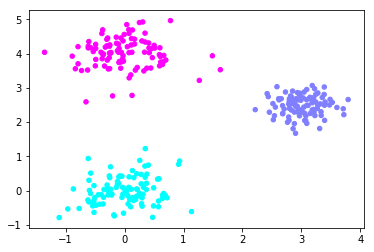

In [54]:
from sklearn.datasets import make_blobs

Xp, yp = make_blobs(n_samples=300, n_features=2, centers=[[0, 0], [3, 2.5], [0, 4]], 
                    cluster_std=[0.45, 0.3, 0.45], random_state=96)
plt.scatter(Xp[:,0], Xp[:,1], c=yp, cmap=plt.get_cmap("cool"), s=20)

Iskoristite skup podataka `Xp` dan gore. Isprobajte vrijednosti hiperparametra $K$ iz $[0,1,\ldots,15]$. Ne trebate dirati nikakve hiperparametre modela osim $K$. Iscrtajte krivulju od $J$ u ovisnosti o broju grupa $K$. Metodom lakta/koljena odredite vrijednost hiperparametra $K$.

In [55]:
from sklearn.cluster import KMeans


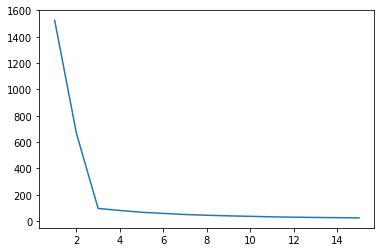

In [58]:
# Vaš kôd ovdje...
Ks = range(1,16)
Js = []
for K in Ks:
    k_means = KMeans(K).fit(Xp)
    Js.append(k_means.inertia_)

plot(Ks, Js)

**Q:** Koju biste vrijednost hiperparametra $K$ izabrali na temelju ovog grafa? Zašto? Je li taj odabir optimalan? Kako to znate?    
**Q:** Je li ova metoda robusna?  
**Q:** Možemo li izabrati onaj $K$ koji minimizira pogrešku $J$? Objasnite.

#### (b)  
Odabir vrijednosti hiperparametra $K$ može se obaviti na mnoštvo načina. Pored metode lakta/koljena, moguće je isto ostvariti i analizom siluete (engl. *silhouette analysis*). Za to smo pripremili funkciju `mlutils.plot_silhouette` koja za dani broj grupa i podatke iscrtava prosječnu vrijednost koeficijenta siluete i vrijednost koeficijenta svakog primjera (kroz grupe). 

Vaš je zadatak isprobati različite vrijednosti hiperparametra $K$, $K \in \{2, 3, 5\}$ i na temelju dobivenih grafova odlučiti se za optimalan $K$.

For n_clusters = 2 The average silhouette_score is : 0.592807961698


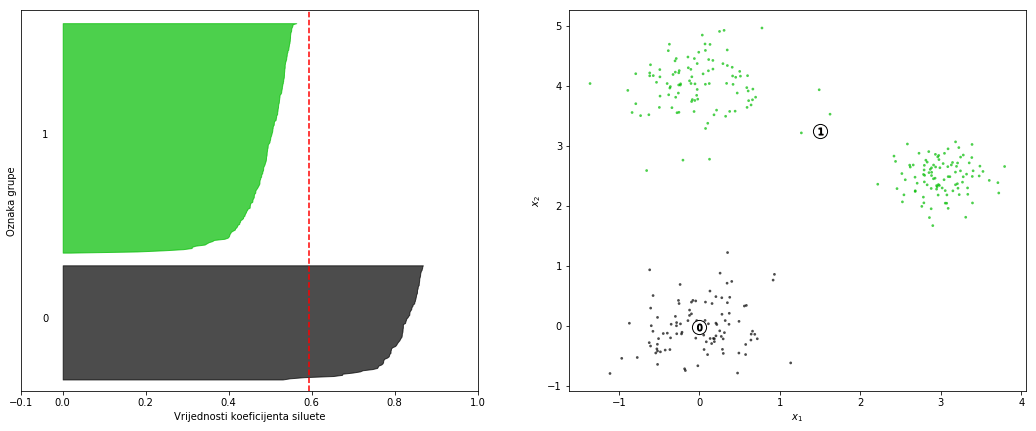

For n_clusters = 3 The average silhouette_score is : 0.797546221206


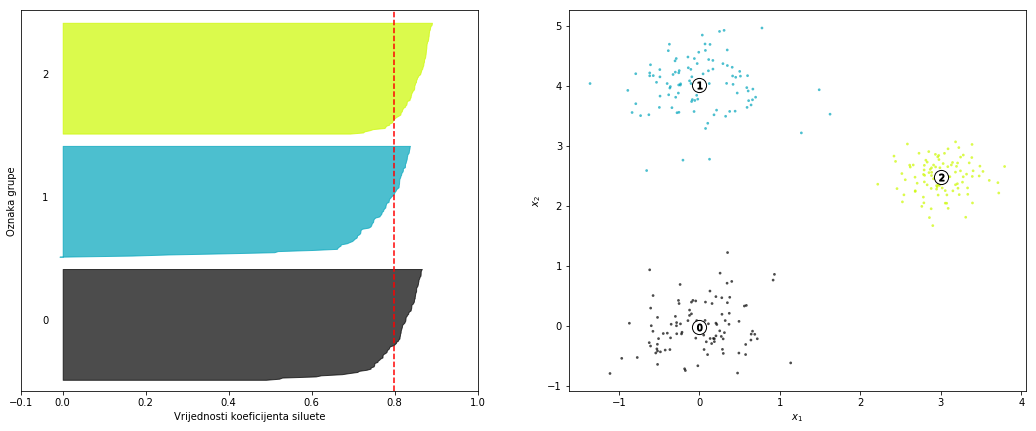

For n_clusters = 5 The average silhouette_score is : 0.505237176601


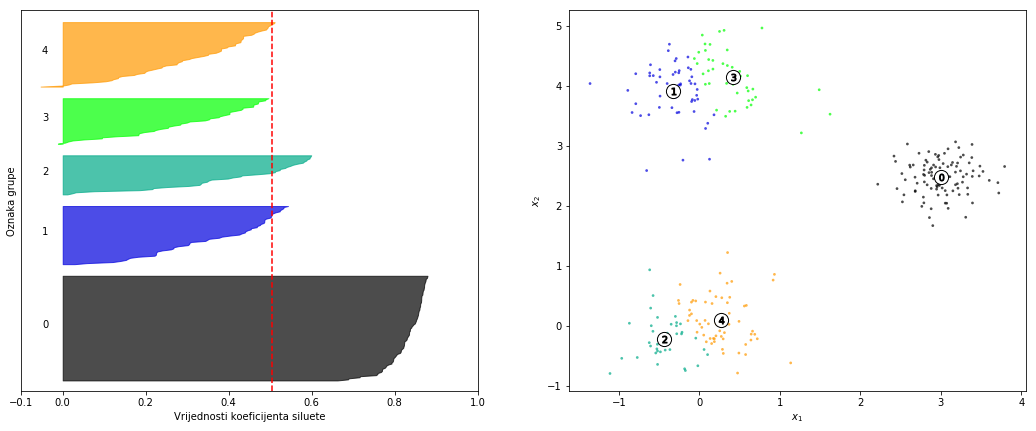

In [61]:
# Vaš kôd ovdje...
Ks = [2, 3, 5]

for i, K in enumerate(Ks):
    k_means = KMeans(K).fit(Xp)
    mlutils.plot_silhouette(K, Xp)

**Q:** Kako biste se gledajući ove slike odlučili za $K$?  
**Q:** Koji su problemi ovog pristupa?

#### (c)  
U ovom i sljedećim podzadatcima fokusirat ćemo se na temeljne pretpostavke algoritma k-srednjih vrijednosti te što se događa ako te pretpostavke nisu zadovoljene. Dodatno, isprobat ćemo i grupiranje modelom Gaussovih mješavina (engl. *Gaussian Mixture Models*; GMM) koji ne nema neke od tih pretpostavki.

Prvo, krenite od podataka `X1`, koji su generirani korištenjem funkcije [`datasets.make_blobs`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html), koja stvara grupe podataka pomoću izotropskih Gaussovih distribucija.

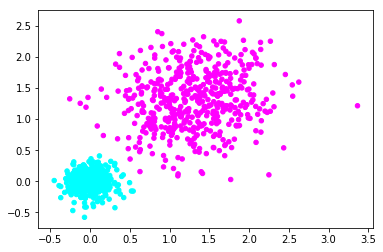

In [62]:
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=1000, n_features=2, centers=[[0, 0], [1.3, 1.3]], cluster_std=[0.15, 0.5], random_state=96)
plt.scatter(X1[:,0], X1[:,1], c=y1, cmap=plt.get_cmap("cool"), s=20)

Naučite model k-srednjih vrijednosti (idealno pretpostavljajući $K=2$) na gornjim podatcima i prikažite dobiveno grupiranje (proučite funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter), posebice argument `c`).

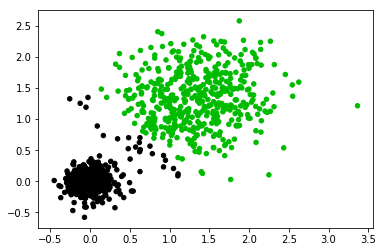

In [66]:
# Vaš kôd ovdje...
labels = KMeans(2).fit_predict(X1)
colors = plt.cm.spectral(labels.astype(float) / 2)
plt.scatter(X1[:, 0], X1[:, 1], c=colors, s=20)

**Q:** Što se dogodilo? Koja je pretpostavka algoritma k-srednjih vrijednosti ovdje narušena?  
**Q:** Što biste morali osigurati kako bi algoritam pronašao ispravne grupe?

#### (d)

Isprobajte algoritam k-srednjih vrijednosti na podatcima generiranim korištenjem funkcije [`datasets.make_circles`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html), koja stvara dvije grupe podataka tako da je jedna unutar druge.

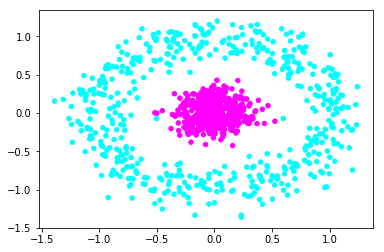

In [67]:
from sklearn.datasets import make_circles

X2, y2 = make_circles(n_samples=1000, noise=0.15, factor=0.05, random_state=96)
plt.scatter(X2[:,0], X2[:,1], c=y2, cmap=plt.get_cmap("cool"), s=20)

Ponovno, naučite model k-srednjih vrijednosti (idealno pretpostavljajući $K=2$) na gornjim podatcima i prikažite dobiveno grupiranje (proučite funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter), posebice argument `c`).

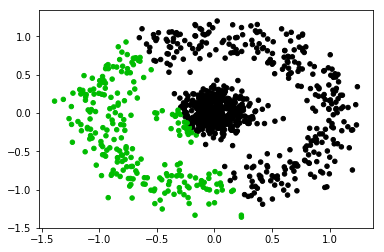

In [71]:
# Vaš kôd ovdje...
labels = KMeans(2).fit_predict(X2)
colors = plt.cm.spectral(labels.astype(float) / 2)
plt.scatter(X2[:, 0], X2[:, 1], c=colors, s=20)

**Q:** Što se dogodilo? Koja je pretpostavka algoritma k-srednjih vrijednosti ovdje narušena?  
**Q:** Što biste morali osigurati kako bi algoritam pronašao ispravne grupe?

#### (e)  
Završno, isprobat ćemo algoritam na sljedećem umjetno stvorenom skupu podataka:

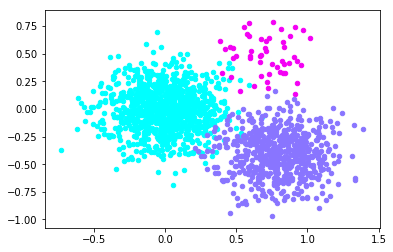

In [69]:
X31, y31 = make_blobs(n_samples=1000, n_features=2, centers=[[0, 0]], cluster_std=[0.2], random_state=69)
X32, y32 = make_blobs(n_samples=50, n_features=2, centers=[[0.7, 0.5]], cluster_std=[0.15], random_state=69)
X33, y33 = make_blobs(n_samples=600, n_features=2, centers=[[0.8, -0.4]], cluster_std=[0.2], random_state=69)
plt.scatter(X31[:,0], X31[:,1], c="#00FFFF", s=20)
plt.scatter(X32[:,0], X32[:,1], c="#F400F4", s=20)
plt.scatter(X33[:,0], X33[:,1], c="#8975FF", s=20)

# Just join all the groups in a single X.
X3 = np.vstack([X31, X32, X33])
y3 = np.hstack([y31, y32, y33])

Ponovno, naučite model k-srednjih vrijednosti (ovaj put idealno pretpostavljajući $K=3$) na gornjim podatcima i prikažite dobiveno grupiranje (proučite funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter), posebice argument `c`).

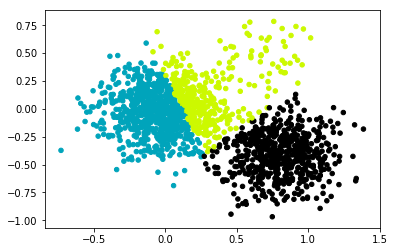

In [72]:
# Vaš kôd ovdje...
labels = KMeans(3).fit_predict(X3)
colors = plt.cm.spectral(labels.astype(float) / 3)
plt.scatter(X3[:, 0], X3[:, 1], c=colors, s=20)

**Q:** Što se dogodilo? Koja je pretpostavka algoritma k-srednjih vrijednosti ovdje narušena?  
**Q:** Što biste morali osigurati kako bi algoritam pronašao ispravne grupe?

#### (f)  
Sada kada ste se upoznali s ograničenjima algoritma k-srednjih vrijednosti, isprobat ćete grupiranje modelom mješavine Gaussa (*Gaussian Mixture Models; GMM*), koji je generalizacija algoritma k-srednjih vrijednosti (odnosno, algoritam k-srednjih vrijednosti specijalizacija je GMM-a). Implementacija ovog modela dostupna je u [`mixture.GaussianMixture`](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture). Isprobajte ovaj model (s istim pretpostavkama o broju grupa) na podacima iz podzadataka (a)-(c). Ne morate mijenjati nikakve hiperparametre ni postavke osim broja komponenti.

In [74]:
from sklearn.mixture import GaussianMixture

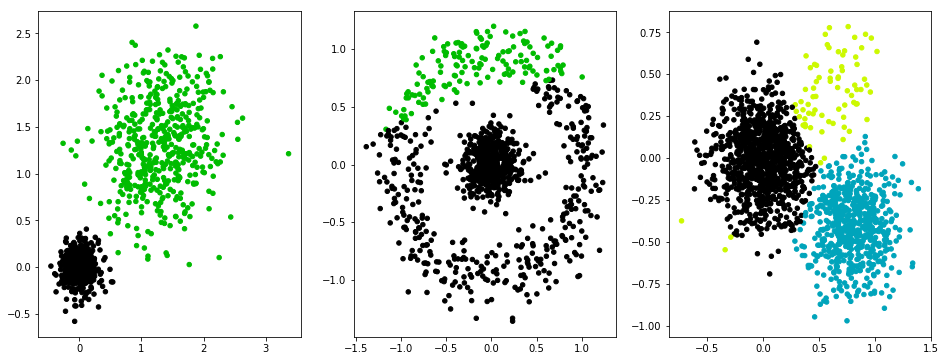

In [79]:
# Vaš kôd ovdje...
GMM1 = GaussianMixture(2).fit(X1)
GMM1_y = GMM1.predict(X1)
GMM2 = GaussianMixture(2).fit(X2)
GMM2_y = GMM2.predict(X2)
GMM3 = GaussianMixture(3).fit(X3)
GMM3_y = GMM3.predict(X3)

figure(figsize=(16,6))

subplot(1,3,1)
colors = plt.cm.spectral(GMM1_y.astype(float) / 2)
plt.scatter(X1[:, 0], X1[:, 1], c=colors, s=20)
subplot(1,3,2)
colors = plt.cm.spectral(GMM2_y.astype(float) / 2)
plt.scatter(X2[:, 0], X2[:, 1], c=colors, s=20)
subplot(1,3,3)
colors = plt.cm.spectral(GMM3_y.astype(float) / 3)
plt.scatter(X3[:, 0], X3[:, 1], c=colors, s=20)

#### (g)  
Kako vrednovati točnost modela grupiranja ako imamo stvarne oznake svih primjera (a u našem slučaju imamo, jer smo mi ti koji smo generirali podatke)? Često korištena mjera jest **Randov indeks** koji je zapravo pandan točnosti u zadatcima klasifikacije. Implementirajte funkciju `rand_index_score(y_gold, y_predict)` koja ga računa. Funkcija prima dva argumenta: listu stvarnih grupa kojima primjeri pripadaju (`y_gold`) i listu predviđenih grupa (`y_predict`). Dobro će vam doći funkcija [`itertools.combinations`](https://docs.python.org/2/library/itertools.html#itertools.combinations).

In [82]:
import itertools as it
from scipy.misc import comb

def rand_index_score(y_gold, y_predict):
    tp_fn = comb(np.bincount(y_gold), 2).sum()
    tp_fp = comb(np.bincount(y_predict), 2).sum()
    A = np.c_[(y_predict, y_gold)]
    tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum() for i in set(y_predict))
    fp = tp_fp - tp
    fn = tp_fn - tp
    tn = comb(len(A), 2) - tp - fp - fn
    return (tp+tn) / (tp+tn+fp+fn)

**Q:** Zašto je Randov indeks pandan točnosti u klasifikacijskim problemima?  
**Q:** Koji su glavni problemi ove metrike?  
**Q:** Zašto se koristi modificirani Randov indeks (engl. *adjusted Rand index*)?  
**Q:** Kako vrednovati kvalitetu grupiranja ako nenamo stvarne oznake primjera? Je li to uopće moguće?

In [86]:
print(rand_index_score(y1, GMM1_y))
print(rand_index_score(y2, GMM2_y))
print(rand_index_score(y3, GMM3_y))


1.0
0.542174174174
0.485319661135
